# AIML Lab Assignment 2
> **Objective** : Data pre-processing

> **Name** : Pranav Sharma

> **SID** : 22103018


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
# Checking datatype of dataframe
type(df)

pandas.core.frame.DataFrame

In [6]:
# Finding shape of the dataframe
df.shape

(10, 4)

In [7]:
# Finding size of the dataframe
df.size

40

In [8]:
# Printing the top 5 rows
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [9]:
X = df.iloc[:,0:3].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [10]:
# Using mean strategy imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
X[:,1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

In [11]:
# Using constant value imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=5)
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
X[:,1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

In [12]:
# Handeling categorical data
# Label Encoding Purchased
Y = df.iloc[:,3].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [13]:
# Handeling categorical data
# Label Encoding Country
Z = df.iloc[:,0].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Z = le.fit_transform(Z)
Z

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

In [14]:
# Handeling categorical data
# Onehot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [15]:
# Splitting dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print("\n")
print(X_train)
print("\n")
print(Y_train)
print("\n")
print(X_test)
print("\n")
print(Y_test)



[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


[0 1 0 0 1 1 0 1]


[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


[0 1]


In [16]:
# Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
print(X_train)
X_test[:, 3:] = sc.transform(X_test[:, 3:])
print("\n")
print(X_test)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


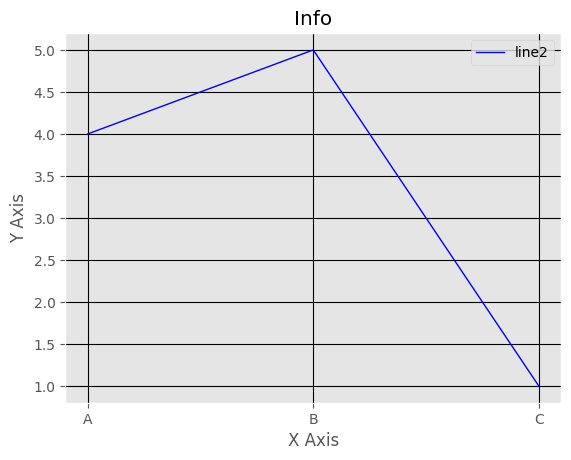

In [17]:
# line chart or linear plot
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.plot(["A","B","C"],[4,5,1], 'b', label='line2', linewidth=1)
plt.title('Info')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True,color='black')
plt.show()

<BarContainer object of 4 artists>

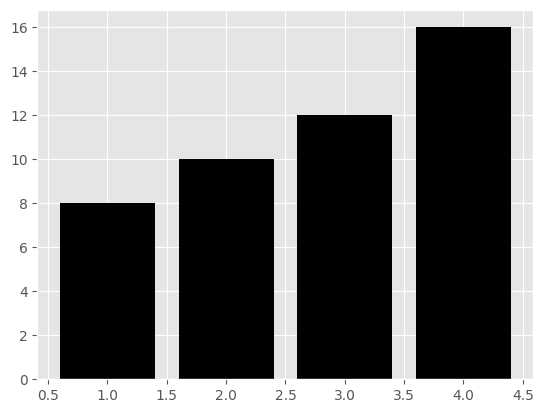

In [20]:
# Bar plot using matplotlib
plt.bar([1,2,3,4],[8,10,12,16], label='barplot',color='black')

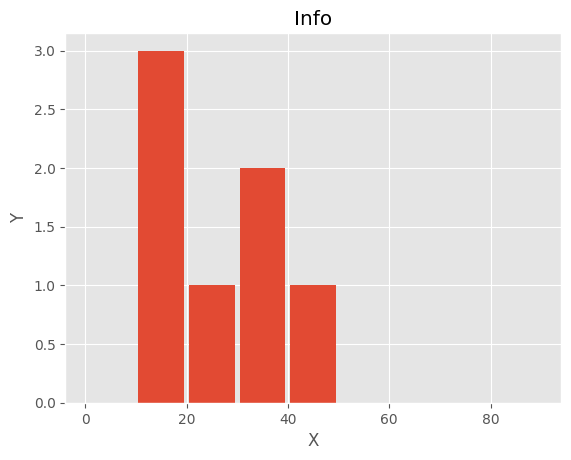

In [22]:
# Histogram plot using matplotlib
population_ages=[10,20,30,35,40,15,112,115,16,190,200]
bins=[0,10,20,30,40,50,60,70,80,90]
plt.hist(population_ages,bins, histtype='bar',rwidth=0.9)
plt.title('Info')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

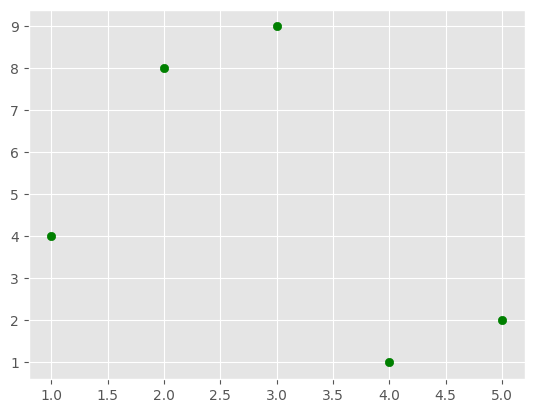

In [21]:
# Scatter plot using matplotlib
x=[1,2,3,4,5]
y=[4,8,9,1,2]
plt.scatter(x,y,label='skitscat',color='g')
plt.show()

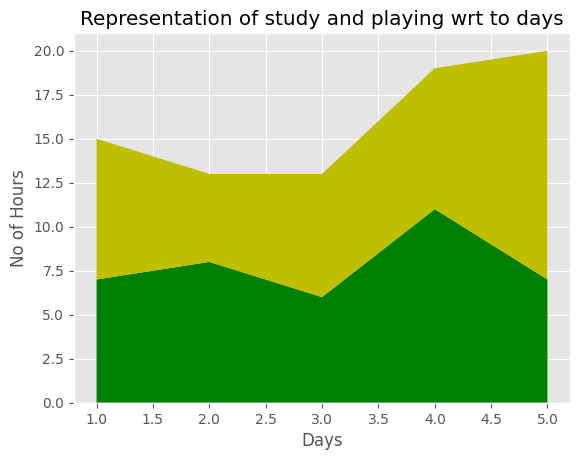

In [23]:
# Stackplot using matplotlib
days = [1, 2, 3, 4, 5]
Studying = [7, 8, 6, 11, 7]
playing =  [8, 5, 7, 8, 13]
plt.stackplot(days, Studying, playing, colors =['g', 'y'])
plt.xlabel('Days')
plt.ylabel('No of Hours')
plt.title('Representation of study and playing wrt to days')
plt.show()